# US Raspberry market analysis

TERMINAL MARKET

    Retail price
  

## Import and cleaning data

In [141]:
import pandas as pd
import datetime
pd.set_option('display.max_columns',None) ## Display all columns in pandas dataframe  
pd.set_option('display.max_rows',None) ## Display all rows in pandas dataframe 

file_name = 'US Raspberry Prices - Terminal Market.xlsx'
prices = pd.DataFrame()
prices=pd.read_excel(file_name\
                    ,header=0)

In [142]:
prices.shape

(156573, 29)

In [143]:
dates1 = pd.to_datetime(date_formated[date_formated.str.len()==10])

In [144]:
dates2 = pd.to_datetime(date_formated[date_formated.str.len()!=10].astype('str').str.strip().str[0:10],format='%Y-%d-%m')

In [149]:
dates_formated = dates1.append(dates2,ignore_index=False,verify_integrity=True).sort_index()

In [150]:
prices['Date']=dates_formated

In [167]:
prices.sort_values('Date',inplace=True)

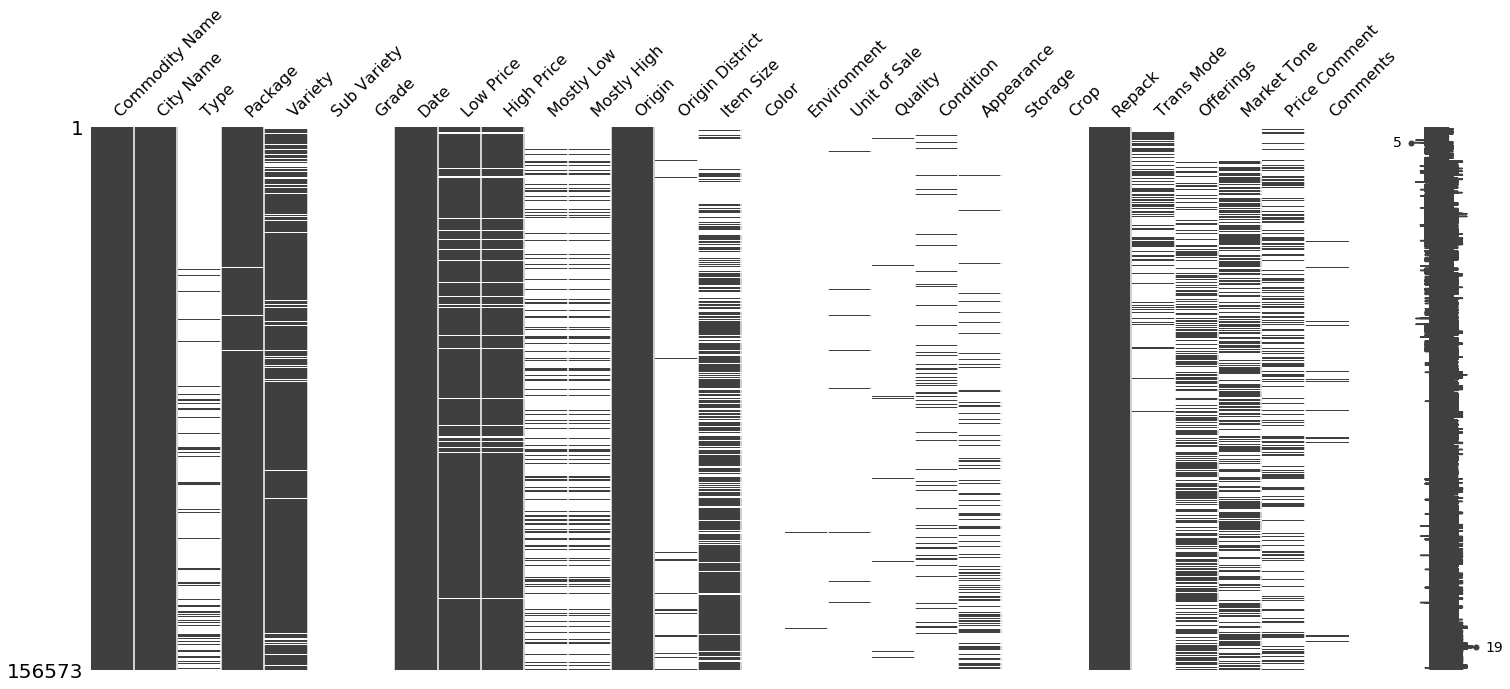

In [168]:
import missingno as msno
msno.matrix(prices)

In [169]:
prices['Package'].unique()

array(['flats 12 6-oz cups with lids',
       'flats 12 1/2-pt cups film wrapped',
       'flats 12 1/2-pt containers with lids',
       'flats 12 5.5-oz cups film wrapped',
       'flats 12 1/2-pt baskets with lids',
       'flats 12 5.6-oz cups with lids', 'flats 12 1/2-pt containers',
       'flats 12 6-oz cups film wrapped', 'flats 12 125-gm cups',
       'flats 12 5.6-oz cups film wrapped',
       'flats 12 5.5-oz cups with lids', '200 gm containers',
       'flats 12 6-oz baskets film wrapped', nan,
       'flats 12 1/2-pt baskets film wrapped', '150 gm containers',
       'flats 12 1-pt baskets', 'flats 12 4.4-oz cups film wrapped',
       '250 gm containers', 'flats 12 8-oz cups film wrapped',
       '4 oz containers', 'flats 12 150-gm cups with lids',
       'flats 24 6-oz cups with lids',
       'flats 6 1/2-pt containers with lids',
       'flats 6 12-oz containers with lids',
       'flats 12 7-oz cups film wrapped',
       'flats 9 8-oz cups film wrapped',
       'flats 6 

In [170]:
prices['Package'].value_counts()

flats 12 6-oz cups with lids             120300
flats 12 1/2-pt containers with lids       7748
flats 12 1/2-pt baskets with lids          7513
flats 12 5.6-oz cups with lids             6944
flats 6 12-oz containers with lids         2453
125 gm containers                          1821
flats 12 8-oz cups film wrapped            1720
flats 12 6-oz baskets film wrapped         1355
flats 12 1/2-pt cups film wrapped          1118
flats 12 5.5-oz cups with lids              809
4 oz containers                             807
flats 12 125-gm cups                        590
flats 12 1-pt baskets                       569
flats 12 1/2-pt baskets film wrapped        485
flats 12 6-oz cups film wrapped             480
cartons 12 12-oz containers with lids       236
flats 12 5.6-oz cups film wrapped           213
flats 12 4.4-oz cups film wrapped           189
flats 6 1/2-pt containers with lids         154
flats 8 125-gm containers with lids          83
250 gm containers                       

In [171]:
prices['Condition'].value_counts()

FR COND      7150
ORD COND     4756
POOR COND    2213
HOLDOVERS     815
HLD OVRS        5
Name: Condition, dtype: int64

In [172]:
prices['Appearance'].value_counts()

FINEAPPEAR    18745
FR APPEAR      3689
ORD APPEAR      270
POORAPPEAR       15
Name: Appearance, dtype: int64

In [173]:
prices['Item Size'].value_counts()

lge    75902
med    21343
sml      898
Name: Item Size, dtype: int64

In [174]:
prices['Origin'].value_counts()

CALIFORNIA        79451
MEXICO            43471
CHILE             21592
WASHINGTON         2481
GUATEMALA          2353
OREGON             1516
SPAIN              1512
CANADA              875
FRANCE              645
POLAND              524
UNITED STATES       445
UNITED KINGDOM      367
COSTA RICA          177
PORTUGAL            161
BELGIUM             137
NETHERLANDS         133
NORTH CAROLINA      129
MOROCCO             105
PENNSYLVANIA         69
GERMANY              63
FLORIDA              61
ILLINOIS             58
ARGENTINA            45
MICHIGAN             44
SOUTH AFRICA         32
IMPORTS              21
NEW ENGLAND          20
MASSACHUSETTS        16
VERMONT              11
MISSOURI              9
NEW YORK              8
ZIMBABWE              5
TANZANIA              3
GEORGIA               3
MARYLAND              2
GREECE                2
NEW JERSEY            2
COLOMBIA              2
SOUTH CAROLINA        2
KENYA                 1
ITALY                 1
VIRGINIA        

In [310]:
prices['Type'].value_counts()

Organic    14967
Name: Type, dtype: int64

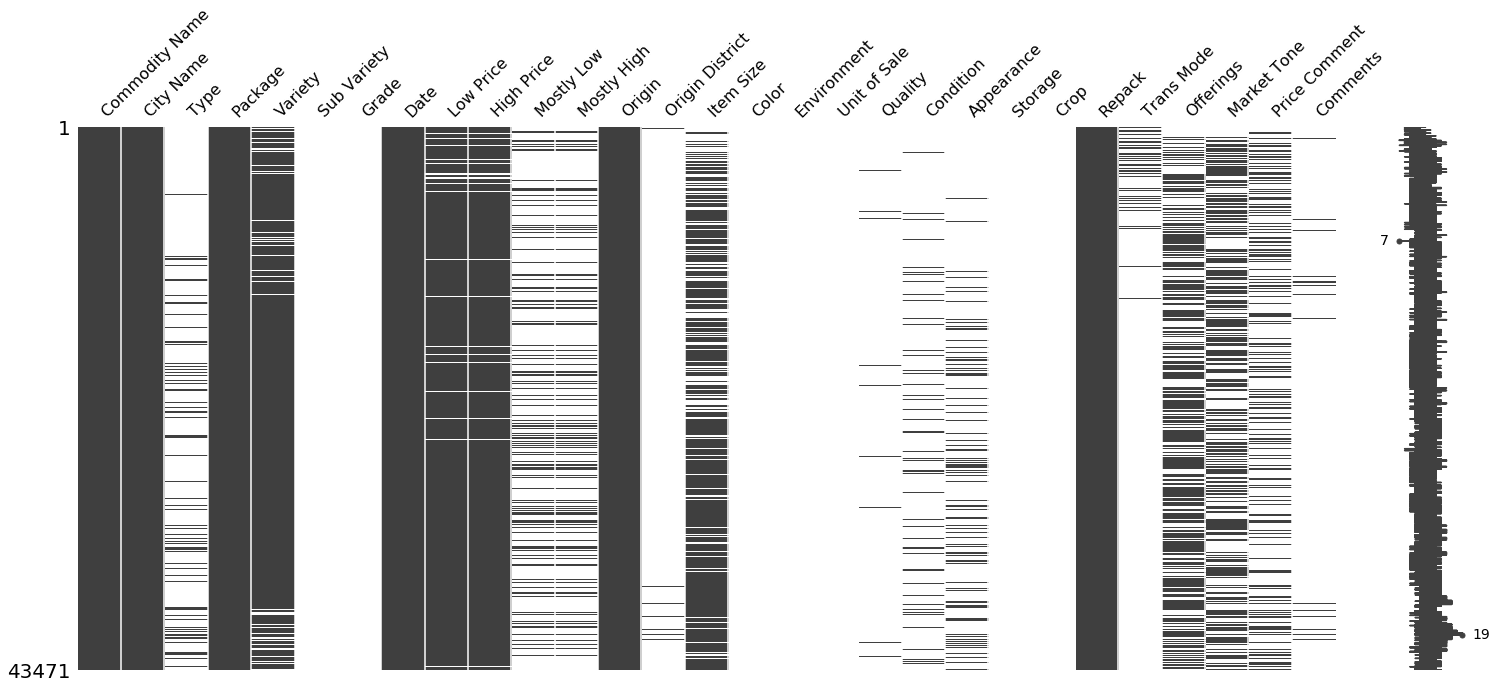

In [175]:
import missingno as msno
msno.matrix(prices[prices['Origin']=='MEXICO'])

In [176]:
prices[prices['Origin']=='MEXICO']['Package'].value_counts()

flats 12 6-oz cups with lids             38972
flats 12 5.6-oz cups with lids            1509
flats 12 1/2-pt containers with lids       788
flats 6 12-oz containers with lids         762
flats 12 1/2-pt baskets with lids          599
flats 12 6-oz baskets film wrapped         307
flats 12 5.5-oz cups with lids             134
cartons 12 12-oz containers with lids      131
flats 12 6-oz cups film wrapped             80
flats 12 5.6-oz cups film wrapped           45
flats 12 4.4-oz cups film wrapped           45
flats 12 125-gm cups                        22
flats 12 1/2-pt baskets film wrapped        21
flats 12 1/2-pt cups film wrapped           15
125 gm containers                           13
flats 8 18-oz containers with lids           8
flats 12 1-pt baskets                        5
flats 24 6-oz cups with lids                 3
flats 6 1/2-pt containers with lids          3
flats 9 8-oz cups film wrapped               2
150 gm containers                            2
flats 8 125-g

In [177]:
prices[prices['Origin']=='MEXICO']['City Name'].value_counts()

BOSTON               6684
NEW YORK             6069
CHICAGO              3981
LOS ANGELES          3475
BALTIMORE            3399
SAN FRANCISCO        3173
DETROIT              3011
ATLANTA              2716
MIAMI                2390
PHILADELPHIA         2386
DALLAS               1656
SEATTLE              1309
COLUMBIA             1154
ST. LOUIS             928
PITTSBURGH            772
TORONTO, ONT          195
MONTREAL, QUE         142
HAMBURG                13
NEW COVENT GARDEN      11
ROTTERDAM               4
BIRMINGHAM, UK          3
Name: City Name, dtype: int64

In [178]:
prices[prices['Origin']=='MEXICO']['Variety'].value_counts()

RED     40614
GOLD      213
Name: Variety, dtype: int64

In [179]:
prices[prices['Origin']=='MEXICO'].describe()

,Grade,Low Price,High Price,Mostly Low,Mostly High,Color
count,0.0,41900.000000,41900.000000,8677.000000,8677.000000,0.0
mean,NaN,27.347979,28.794299,26.630575,27.545811,NaN
std,NaN,10.499061,10.439865,9.381429,9.507429,NaN
min,NaN,0.100000,0.100000,0.250000,0.250000,NaN
25%,NaN,21.000000,22.000000,21.000000,22.000000,NaN
50%,NaN,28.000000,30.000000,27.000000,28.000000,NaN
75%,NaN,34.000000,36.000000,33.000000,34.000000,NaN
max,NaN,68.000000,70.500000,60.000000,60.000000,NaN


In [185]:
prices[(prices['Origin']=='MEXICO') & (prices['Date']>'2018-12-31')].describe()

,Grade,Low Price,High Price,Mostly Low,Mostly High,Color
count,0.0,3813.000000,3813.000000,769.000000,769.000000,0.0
mean,NaN,25.919355,27.319958,23.566970,24.399220,NaN
std,NaN,11.166252,10.976444,8.230637,8.456571,NaN
min,NaN,0.250000,1.000000,0.250000,0.250000,NaN
25%,NaN,20.000000,22.000000,19.000000,20.000000,NaN
50%,NaN,26.000000,28.000000,25.000000,26.000000,NaN
75%,NaN,32.000000,34.000000,28.500000,30.000000,NaN
max,NaN,65.000000,65.000000,48.000000,48.000000,NaN


In [186]:
prices[prices['Origin']=='MEXICO']['Unit of Sale'].value_counts()

PER CUP    2
Name: Unit of Sale, dtype: int64

In [187]:
prices[prices['Origin']=='MEXICO']['Quality'].value_counts()

FINE QUAL    439
FR QUAL      333
ORD QUAL      43
POOR QUAL      9
Name: Quality, dtype: int64

In [188]:
prices[prices['Origin']=='MEXICO']['Condition'].value_counts()

FR COND      2128
ORD COND     1506
POOR COND     667
HOLDOVERS     340
Name: Condition, dtype: int64

In [189]:
prices[prices['Origin']=='MEXICO']['Appearance'].value_counts()

FINEAPPEAR    7553
FR APPEAR     1107
ORD APPEAR      78
POORAPPEAR       1
Name: Appearance, dtype: int64

In [190]:
prices[prices['Origin']=='MEXICO']['Repack'].value_counts()

N    43471
Name: Repack, dtype: int64

In [192]:
prices[prices['Origin']=='MEXICO']['City Name'].value_counts()

BOSTON               6684
NEW YORK             6069
CHICAGO              3981
LOS ANGELES          3475
BALTIMORE            3399
SAN FRANCISCO        3173
DETROIT              3011
ATLANTA              2716
MIAMI                2390
PHILADELPHIA         2386
DALLAS               1656
SEATTLE              1309
COLUMBIA             1154
ST. LOUIS             928
PITTSBURGH            772
TORONTO, ONT          195
MONTREAL, QUE         142
HAMBURG                13
NEW COVENT GARDEN      11
ROTTERDAM               4
BIRMINGHAM, UK          3
Name: City Name, dtype: int64

In [195]:
prices[(prices['Origin']=='MEXICO') & (prices['City Name']=='SAN FRANCISCO')].describe()

,Grade,Low Price,High Price,Mostly Low,Mostly High,Color
count,0.0,3139.000000,3139.000000,449.000000,449.000000,0.0
mean,NaN,32.953648,34.136907,31.062361,31.388641,NaN
std,NaN,8.965357,9.088387,7.529518,7.471812,NaN
min,NaN,5.000000,6.000000,15.000000,15.000000,NaN
25%,NaN,28.000000,28.000000,26.000000,26.000000,NaN
50%,NaN,32.000000,34.000000,31.000000,31.000000,NaN
75%,NaN,39.000000,40.000000,34.000000,34.000000,NaN
max,NaN,56.500000,58.000000,54.000000,54.000000,NaN


Dimension reduction
    
    FIELD	     FILTER
    City Name	 All
    Package	   flats 12 6-oz cups with lids
    Variety	   RED
    Origin	    MEXICO
    Quality	   Blank or FINE QUAL
    Condition	 Blank
    Appearance	Blank or FINEAPPEAR
    Date
    Low Price	
    High Price	

In [311]:
clean_prices = prices\
    [['City Name',\
        'Package',\
        'Variety',\
        'Origin',\
        'Date',\
        'Low Price',\
        'High Price']]\
    [(prices['Origin']=='MEXICO')\
     & (prices['Package']=='flats 12 6-oz cups with lids')\
     & (prices['Variety']=='RED')\
     & ((pd.isna(prices['Quality'])) | (prices['Quality']=='FINE QUAL')) 
     & (pd.isna(prices['Condition']))\
     & (pd.isna(prices['Type']))\
     & ((pd.isna(prices['Appearance'])) | (prices['Appearance']=='FINEAPPEAR')) ]\

In [323]:
import datetime
clean_prices['Date'] = pd.to_datetime(clean_prices['Date'])
clean_prices['Year'] = pd.DatetimeIndex(clean_prices['Date']).year
clean_prices['Month'] = pd.DatetimeIndex(clean_prices['Date']).month
clean_prices['Week'] = pd.DatetimeIndex(clean_prices['Date']).week
clean_prices['Weekday'] = pd.DatetimeIndex(clean_prices['Date']).weekday_name

In [322]:
pd.DatetimeIndex(clean_prices['Date']).weekday_name.value_counts()

Wednesday    6006
Friday       5791
Tuesday      5763
Thursday     5608
Monday       5314
Name: Date, dtype: int64

In [343]:
clean_prices.tail(100)

,City Name,Package,Variety,Origin,Date,Low Price,High Price,Year,Month,Week,Weekday
3553,ATLANTA,flats 12 6-oz cups with lids,RED,MEXICO,2020-02-03,26.0,29.0,2020,2,6,Monday
8080,BALTIMORE,flats 12 6-oz cups with lids,RED,MEXICO,2020-02-03,34.0,34.0,2020,2,6,Monday
54556,NEW YORK,flats 12 6-oz cups with lids,RED,MEXICO,2020-02-03,18.0,21.0,2020,2,6,Monday
41191,LOS ANGELES,flats 12 6-oz cups with lids,RED,MEXICO,2020-02-03,26.0,26.0,2020,2,6,Monday
27744,COLUMBIA,flats 12 6-oz cups with lids,RED,MEXICO,2020-02-03,30.0,30.0,2020,2,6,Monday
65936,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,MEXICO,2020-02-03,25.0,27.0,2020,2,6,Monday
61258,PHILADELPHIA,flats 12 6-oz cups with lids,RED,MEXICO,2020-02-03,26.0,26.0,2020,2,6,Monday
61259,PHILADELPHIA,flats 12 6-oz cups with lids,RED,MEXICO,2020-02-03,24.0,24.0,2020,2,6,Monday
8081,BALTIMORE,flats 12 6-oz cups with lids,RED,MEXICO,2020-02-03,31.0,31.0,2020,2,6,Monday
23385,CHICAGO,flats 12 6-oz cups with lids,RED,MEXICO,2020-02-03,20.0,20.0,2020,2,6,Monday


In [328]:
clean_prices[clean_prices['Weekday']=='Monday'].describe()

,Low Price,High Price,Year,Month,Week
count,5122.000000,5122.000000,5314.000000,5314.000000,5314.000000
mean,29.100119,30.606755,2011.767030,5.605570,22.207565
std,7.740089,7.718613,5.450798,3.832687,16.575092
min,3.000000,6.000000,1998.000000,1.000000,1.000000
25%,24.000000,24.500000,2008.000000,3.000000,10.000000
50%,29.500000,30.000000,2013.000000,4.000000,17.000000
75%,34.000000,36.000000,2016.000000,10.000000,42.000000
max,60.000000,60.000000,2020.000000,12.000000,53.000000


In [329]:
clean_prices[clean_prices['Weekday']=='Tuesday'].describe()

,Low Price,High Price,Year,Month,Week
count,5603.000000,5603.000000,5763.000000,5763.000000,5763.000000
mean,29.024299,30.473339,2012.061253,5.412459,21.607670
std,7.719733,7.677512,5.371667,3.865416,16.750097
min,6.000000,6.000000,1998.000000,1.000000,1.000000
25%,24.000000,24.500000,2009.000000,2.000000,8.000000
50%,29.000000,30.000000,2013.000000,4.000000,16.000000
75%,34.000000,36.000000,2016.000000,10.000000,41.000000
max,60.000000,60.000000,2020.000000,12.000000,53.000000


In [330]:
clean_prices[clean_prices['Weekday']=='Wednesday'].describe()

,Low Price,High Price,Year,Month,Week
count,5817.000000,5817.00000,6006.00000,6006.000000,6006.000000
mean,28.888695,30.44355,2011.84299,5.417915,21.791375
std,7.721699,7.71250,5.43414,3.858812,16.837864
min,8.000000,9.00000,1998.00000,1.000000,1.000000
25%,24.000000,24.00000,2008.00000,2.000000,8.000000
50%,29.000000,30.00000,2013.00000,4.000000,16.000000
75%,34.000000,36.00000,2016.00000,10.000000,42.000000
max,60.000000,60.00000,2020.00000,12.000000,53.000000


In [331]:
clean_prices[clean_prices['Weekday']=='Thursday'].describe()

,Low Price,High Price,Year,Month,Week
count,5443.000000,5443.000000,5608.000000,5608.000000,5608.000000
mean,28.914376,30.377595,2012.027996,5.358773,21.488409
std,7.899707,7.834261,5.426070,3.853528,16.785076
min,1.000000,1.000000,1998.000000,1.000000,1.000000
25%,24.000000,24.000000,2008.000000,2.000000,8.000000
50%,29.000000,30.000000,2013.000000,4.000000,16.000000
75%,34.000000,36.000000,2016.000000,10.000000,41.000000
max,60.000000,60.000000,2020.000000,12.000000,53.000000


In [332]:
clean_prices[clean_prices['Weekday']=='Friday'].describe()

,Low Price,High Price,Year,Month,Week
count,5599.000000,5599.000000,5791.000000,5791.000000,5791.000000
mean,28.860972,30.395749,2011.833362,5.346918,21.305819
std,7.924238,7.890619,5.460143,3.850668,16.796370
min,5.000000,6.000000,1998.000000,1.000000,1.000000
25%,24.000000,24.000000,2008.000000,2.000000,8.000000
50%,29.000000,30.000000,2013.000000,4.000000,16.000000
75%,34.000000,36.000000,2016.000000,10.000000,41.000000
max,60.000000,60.000000,2020.000000,12.000000,52.000000


In [407]:
prices_wk_ct = pd.DataFrame()
prices_wk_ct = clean_prices[(clean_prices['City Name']=='SAN FRANCISCO')\
             & (clean_prices['Year']>1998)].groupby(['Year','Week'])[['Low Price','High Price']].\
            agg('median').reset_index().dropna()
prices_wk_ct['Year-Week']=prices_wk_ct['Year'].astype(str) + '-' + ('0'+prices_wk_ct['Week'].astype(str)).str[0:2]

In [408]:
prices_wk_ct

,Year,Week,Low Price,High Price,Year-Week
0,1999,1,34.5,34.50,1999-01
1,1999,2,36.5,36.50,1999-02
2,1999,3,37.0,37.50,1999-03
3,1999,4,41.0,41.00,1999-04
4,1999,5,41.0,41.00,1999-05
5,1999,6,36.5,38.00,1999-06
6,1999,7,33.0,35.50,1999-07
7,1999,8,26.0,26.50,1999-08
8,1999,9,22.5,26.50,1999-09
9,1999,10,22.0,22.50,1999-01


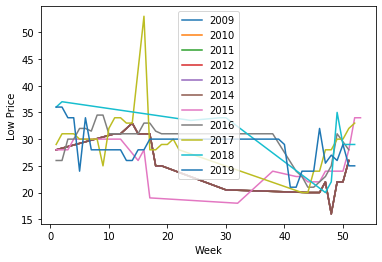

In [415]:
sns.lineplot(x=prices_wk_ct[prices_wk_ct['Year']==2014]['Week'], y=prices_wk_ct['Low Price'],label='2009')
sns.lineplot(x=prices_wk_ct[prices_wk_ct['Year']==2014]['Week'], y=prices_wk_ct['Low Price'],label='2010')
sns.lineplot(x=prices_wk_ct[prices_wk_ct['Year']==2014]['Week'], y=prices_wk_ct['Low Price'],label='2011')
sns.lineplot(x=prices_wk_ct[prices_wk_ct['Year']==2014]['Week'], y=prices_wk_ct['Low Price'],label='2012')
sns.lineplot(x=prices_wk_ct[prices_wk_ct['Year']==2014]['Week'], y=prices_wk_ct['Low Price'],label='2013')
sns.lineplot(x=prices_wk_ct[prices_wk_ct['Year']==2014]['Week'], y=prices_wk_ct['Low Price'],label='2014')
sns.lineplot(x=prices_wk_ct[prices_wk_ct['Year']==2015]['Week'], y=prices_wk_ct['Low Price'],label='2015')
sns.lineplot(x=prices_wk_ct[prices_wk_ct['Year']==2016]['Week'], y=prices_wk_ct['Low Price'],label='2016')
sns.lineplot(x=prices_wk_ct[prices_wk_ct['Year']==2017]['Week'], y=prices_wk_ct['Low Price'],label='2017')
sns.lineplot(x=prices_wk_ct[prices_wk_ct['Year']==2018]['Week'], y=prices_wk_ct['Low Price'],label='2018')
sns.lineplot(x=prices_wk_ct[prices_wk_ct['Year']==2019]['Week'], y=prices_wk_ct['Low Price'],label='2019')

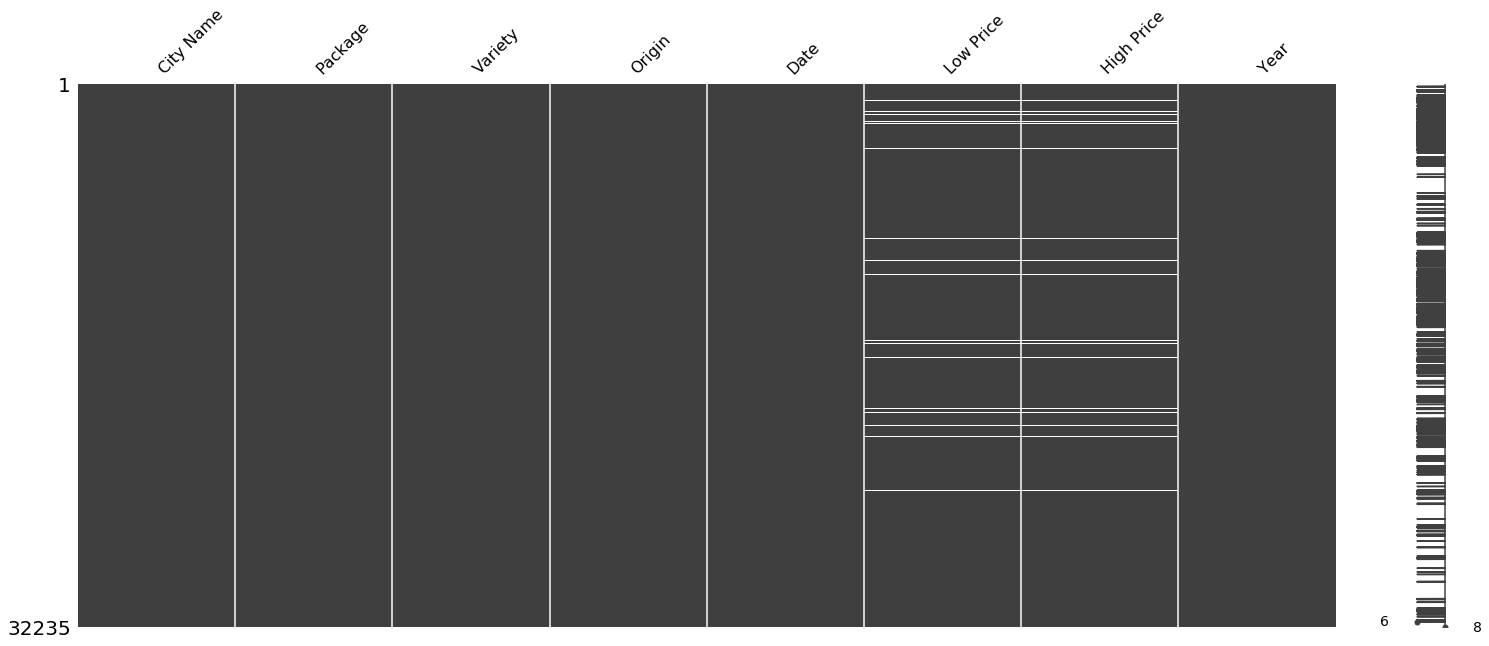

In [284]:
import missingno as msno
msno.matrix(clean_prices)

In [294]:
clean_prices.head(100)

,City Name,Package,Variety,Origin,Date,Low Price,High Price,Year
149906,DETROIT,flats 12 6-oz cups with lids,RED,MEXICO,1998-01-02,30.0,30.0,1998
155187,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,MEXICO,1998-01-02,24.5,26.0,1998
149908,DETROIT,flats 12 6-oz cups with lids,RED,MEXICO,1998-01-05,32.0,34.0,1998
155190,SAN FRANCISCO,flats 12 6-oz cups with lids,RED,MEXICO,1998-01-05,31.0,31.0,1998
149909,DETROIT,flats 12 6-oz cups with lids,RED,MEXICO,1998-01-06,32.0,34.0,1998
149910,DETROIT,flats 12 6-oz cups with lids,RED,MEXICO,1998-01-07,32.0,34.0,1998
149911,DETROIT,flats 12 6-oz cups with lids,RED,MEXICO,1998-01-09,38.0,38.0,1998
149913,DETROIT,flats 12 6-oz cups with lids,RED,MEXICO,1998-01-12,38.0,40.0,1998
148322,CHICAGO,flats 12 6-oz cups with lids,RED,MEXICO,1998-01-12,32.0,32.0,1998
148324,CHICAGO,flats 12 6-oz cups with lids,RED,MEXICO,1998-01-13,32.0,32.0,1998


In [286]:
clean_prices.describe()

,Low Price,High Price,Year
count,31140.000000,31140.000000,32235.000000
mean,29.999688,31.447901,2012.264681
std,8.551554,8.459824,5.329823
min,1.000000,1.000000,1998.000000
25%,24.000000,25.000000,2009.000000
50%,30.000000,31.000000,2014.000000
75%,36.000000,36.000000,2017.000000
max,66.000000,68.000000,2020.000000


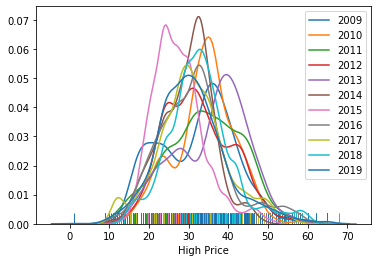

In [293]:
import seaborn as sns
sns.distplot(clean_prices[clean_prices['Year']==2009]['High Price'].dropna(),label='2009',rug=True, hist=False)
sns.distplot(clean_prices[clean_prices['Year']==2010]['High Price'].dropna(),label='2010',rug=True, hist=False)
sns.distplot(clean_prices[clean_prices['Year']==2011]['High Price'].dropna(),label='2011',rug=True, hist=False)
sns.distplot(clean_prices[clean_prices['Year']==2012]['High Price'].dropna(),label='2012',rug=True, hist=False)
sns.distplot(clean_prices[clean_prices['Year']==2013]['High Price'].dropna(),label='2013',rug=True, hist=False)
sns.distplot(clean_prices[clean_prices['Year']==2014]['High Price'].dropna(),label='2014',rug=True, hist=False)
sns.distplot(clean_prices[clean_prices['Year']==2015]['High Price'].dropna(),label='2015',rug=True, hist=False)
sns.distplot(clean_prices[clean_prices['Year']==2016]['High Price'].dropna(),label='2016',rug=True, hist=False)
sns.distplot(clean_prices[clean_prices['Year']==2017]['High Price'].dropna(),label='2017',rug=True, hist=False)
sns.distplot(clean_prices[clean_prices['Year']==2018]['High Price'].dropna(),label='2018',rug=True, hist=False)
sns.distplot(clean_prices[clean_prices['Year']==2019]['High Price'].dropna(),label='2019',rug=True, hist=False)

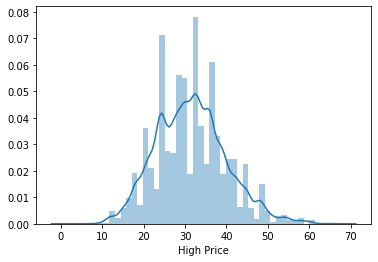

In [264]:
import seaborn as sns
sns.distplot(clean_prices['High Price'].dropna())

/home/matozqui/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


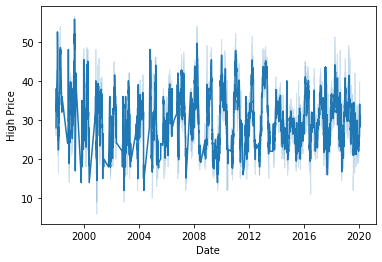

In [266]:
sns.lineplot(x=clean_prices['Date'], y=clean_prices['High Price'], palette="tab10", linewidth=1.5)

SHIPPING POINT

    Prices represent open (spot) market sales by first handlers on product of generally good quality and condition unless otherwise stated and may include promotional allowances or other incentives. No consideration is given to after-sale adjustments unless otherwise stated. Brokerage fees paid by the shipper are included in the price reported.